# Importação dos dados

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
pasta = 'data'
arquivos_csv = [os.path.join(pasta, arquivo) for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]
dfs = []

for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, delimiter=";", decimal=",")
    dfs.append(df)

df_unido = pd.concat(dfs, ignore_index=True)
df_unido.to_csv('arquivo_unido.csv', index=False)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 206259, saw 180


In [8]:
df = pd.read_csv('data/arquivo_unido.csv', low_memory=False)

# Analise das notas gerais

In [9]:
nota_min = float(df['NU_NOTA_CANDIDATO'].min())
nota_max = float(df['NU_NOTA_CANDIDATO'].max())
print(f'MENOR NOTA:{nota_min:.2f} \nMAIOR NOTA:{nota_max:.2f}')

MENOR NOTA:147.43 
MAIOR NOTA:875.45


In [10]:
media = df['NU_NOTA_CANDIDATO'].mean()
mediana = df['NU_NOTA_CANDIDATO'].median()
print(f'Medias das notas:{media:.2f} \nMediana das notas:{mediana:.2f}')

Medias das notas:626.91 
Mediana das notas:630.98


In [11]:
def nota(nota):
    # Calcular valores mínimo e máximo da coluna
    nota_min = float(df['NU_NOTA_CANDIDATO'].min())
    nota_max = float(df['NU_NOTA_CANDIDATO'].max())

    # Calcular total de notas e percentual abaixo da nota fornecida
    notas_totais = len(df)
    notas_abaixo = df[df['NU_NOTA_CANDIDATO'] < nota].shape[0]
    percentual_abaixo = (notas_abaixo / notas_totais) * 100

    # Calcular média e mediana
    media = df['NU_NOTA_CANDIDATO'].mean()
    mediana = df['NU_NOTA_CANDIDATO'].median()

    # Criar o histograma
    plt.figure(figsize=(20, 6))
    plt.hist(
        df['NU_NOTA_CANDIDATO'],
        bins=200,  # Ajuste aqui conforme sua necessidade
        range=(nota_min, nota_max),
        edgecolor='black',
        alpha=0.7
    )
    plt.title('Distribuição de Notas dos Candidatos')
    plt.xlabel('Nota do Candidato')
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adicionar rótulos no eixo X
    plt.xticks(np.arange(nota_min, nota_max + 1, 50), rotation=90)

    # Adicionar linha para destacar a nota específica
    plt.axvline(x=nota, color='red', linestyle='--', linewidth=2, label=f'Nota {nota}')

    # Adicionar texto com percentual, média e mediana
    plt.text(
        nota + 80, plt.gca().get_ylim()[1] * 0.9,  # Ajustar a posição
        f'Esta nota está acima\n de {percentual_abaixo:.2f}% das notas\n'
        f'MÉDIA: {media:.2f}\nMEDIANA: {mediana:.2f}',
        color='red',
        fontsize=12,
        ha='center',
        va='top'
    )
    plt.legend()

    # Exibir o gráfico
    plt.show()


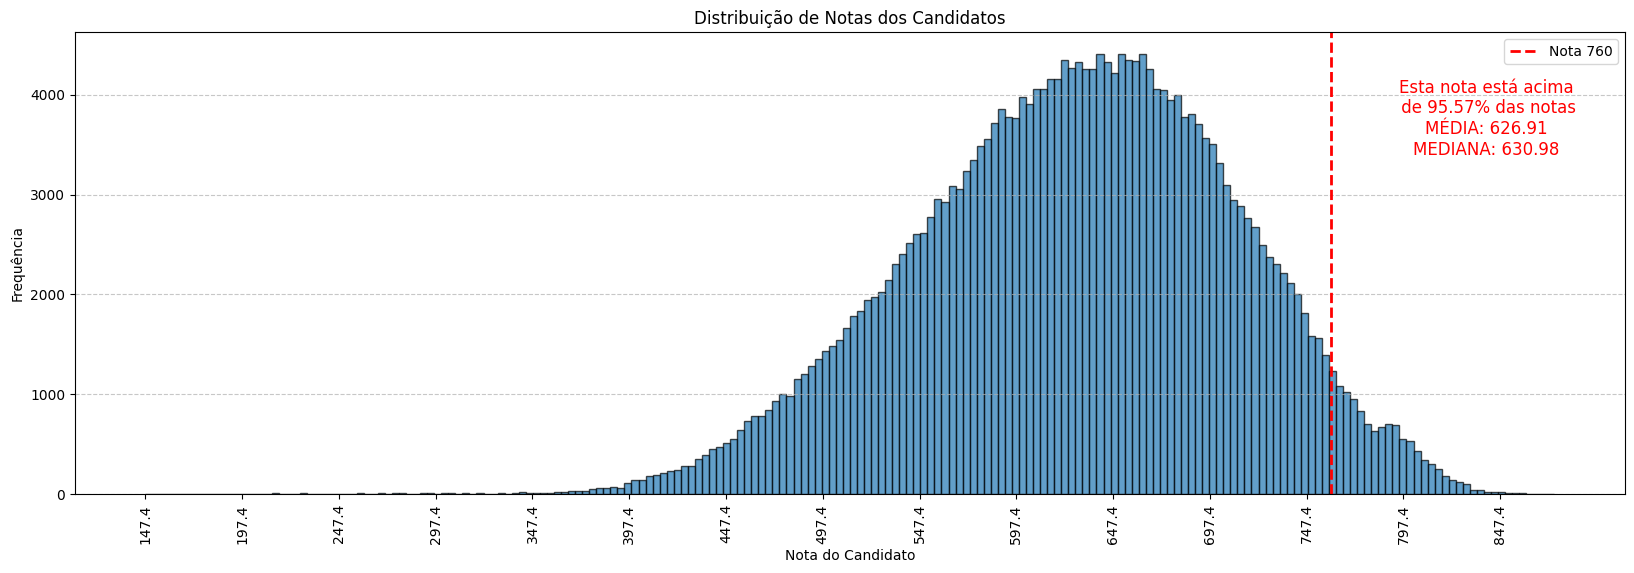

In [12]:
nota(760)

#　Analise das notas de corte das faculdades


In [13]:
df_faculdade = df.drop(columns=['NU_NOTA_CANDIDATO', 'NO_INSCRITO', 'CO_INSCRICAO_ENEM', 'NU_CLASSIFICACAO', 'ENSINO_MEDIO', 'QUILOMBOLA', 'DEFICIENTE'])
df_faculdade = df_faculdade.drop_duplicates()
df_faculdade.to_csv('nota_corte_faculdades.csv', index=False)

In [14]:
df_faculdade = pd.read_csv('nota_corte_faculdades.csv', low_memory=False)
df_faculdade

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTACORTE_CONCORRIDA,TIPO_CONCORRENCIA
0,5242,UNIVERSIDADE ESTADUAL DE ALAGOAS - UNEAL,UNEAL,AL,Unidade SEDE,103385,QUÍMICA,Noturno,Licenciatura,20,"LEI Nº 6.542, DE 7 DE DEZEMBRO DE 2004. ESTABE...",NÃO,NaN,NaN,538.48,V
1,5242,UNIVERSIDADE ESTADUAL DE ALAGOAS - UNEAL,UNEAL,AL,Unidade SEDE,103385,QUÍMICA,Noturno,Licenciatura,20,Ampla concorrência,NÃO,NaN,NaN,568.50,AC
2,5242,UNIVERSIDADE ESTADUAL DE ALAGOAS - UNEAL,UNEAL,AL,Campus IV - São Miguel dos Campos,112326,CIÊNCIAS CONTÁBEIS,Noturno,Bacharelado,20,"LEI Nº 6.542, DE 7 DE DEZEMBRO DE 2004. ESTABE...",NÃO,NaN,NaN,564.31,V
3,5242,UNIVERSIDADE ESTADUAL DE ALAGOAS - UNEAL,UNEAL,AL,Campus IV - São Miguel dos Campos,112326,CIÊNCIAS CONTÁBEIS,Noturno,Bacharelado,20,Ampla concorrência,NÃO,NaN,NaN,609.86,AC
4,5242,UNIVERSIDADE ESTADUAL DE ALAGOAS - UNEAL,UNEAL,AL,Unidade SEDE,9976,ADMINISTRAÇÃO,Noturno,Bacharelado,20,Ampla concorrência,NÃO,NaN,NaN,636.21,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38611,3184,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",IFRR,RR,Unidade SEDE,1151328,CIÊNCIAS BIOLÓGICAS,Vespertino,Licenciatura,1,"Candidatos com deficiência, que tenham renda f...",NÃO,NaN,NaN,363.80,LB_PCD
38612,3184,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",IFRR,RR,Unidade SEDE,1152312,MATEMÁTICA,Noturno,Licenciatura,1,"Candidatos autodeclarados pretos, pardos ou in...",NÃO,NaN,NaN,580.14,LI_PPI
38613,3184,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",IFRR,RR,Unidade SEDE,85402,EDUCAÇÃO FÍSICA,Matutino,Licenciatura,1,"Candidatos que, independentemente da renda, te...",NÃO,NaN,NaN,658.40,LI_EP
38614,3184,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",IFRR,RR,Unidade SEDE,1151328,CIÊNCIAS BIOLÓGICAS,Vespertino,Licenciatura,1,"Candidatos que, independentemente da renda, te...",NÃO,NaN,NaN,646.76,LI_EP


In [15]:
def cortes():
    nota_min = int(df_faculdade['NU_NOTACORTE_CONCORRIDA'].min())
    nota_max = int(df_faculdade['NU_NOTACORTE_CONCORRIDA'].max())

    media = df_faculdade['NU_NOTACORTE_CONCORRIDA'].mean()
    mediana = df_faculdade['NU_NOTACORTE_CONCORRIDA'].median()

    plt.figure(figsize=(12, 6))
    plt.hist(
        df_faculdade['NU_NOTACORTE_CONCORRIDA'],
        bins=200,
        range=(nota_min, nota_max),
        edgecolor='black',
        alpha=0.7
    )
    plt.title('Distribuição das Notas de Corte')
    plt.xlabel('Nota de corte')
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(np.arange(nota_min, nota_max + 1, 50), rotation=90)

    plt.text(
        nota_max - 40,
        plt.gca().get_ylim()[1] * 0.9,
        f'MÉDIA: {media:.2f}\nMEDIANA: {mediana:.2f}',
        color='gray',
        fontsize=12,
        ha='center',
        va='top'
    )
    plt.show()


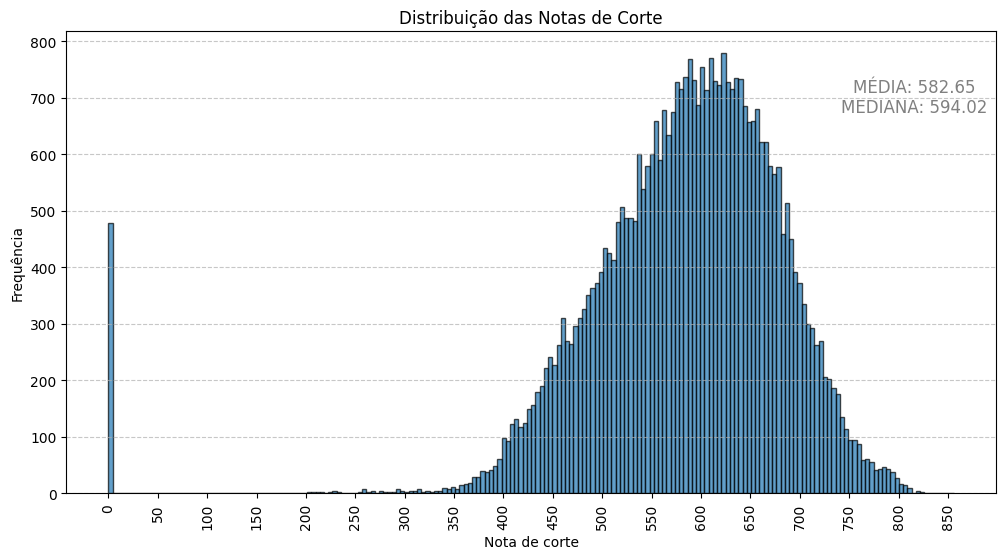

In [16]:
cortes()

   Estado  MediaNotaCandidato  MedianaNotaCandidato  QuantidadeCandidatos
0      AC          571.938398               567.880                  2210
1      AL          614.485095               612.625                  5250
2      AM          615.250340               618.160                  2942
3      AP          600.803919               602.780                   694
4      BA          608.371336               614.060                 21963
5      CE          638.603054               643.100                 14584
6      DF          738.470937               732.785                   160
7      ES          643.148987               653.350                  6357
8      GO          637.612398               645.875                  6972
9      MA          604.999922               602.040                  8235
10     MG          644.739675               652.640                 34143
11     MS          602.595196               608.915                  4594
12     MT          592.460647         

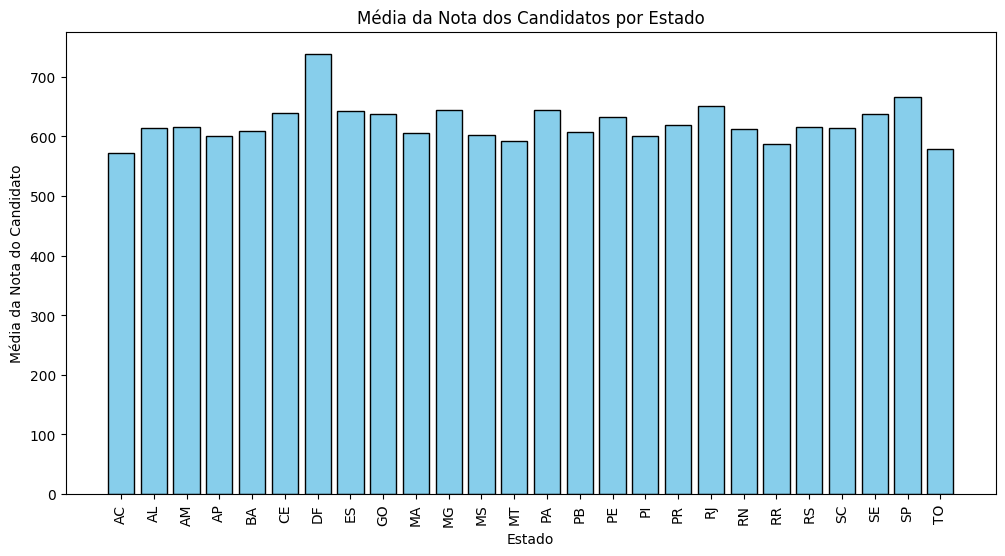

In [17]:
df_por_estado = df.groupby('SG_UF_IES')['NU_NOTA_CANDIDATO'].agg(['mean', 'median', 'count']).reset_index()
df_por_estado.columns = ['Estado', 'MediaNotaCandidato', 'MedianaNotaCandidato', 'QuantidadeCandidatos']
print(df_por_estado)

# Plotando um gráfico de barras da média de notas por estado
plt.figure(figsize=(12, 6))
plt.bar(df_por_estado['Estado'], df_por_estado['MediaNotaCandidato'], color='skyblue', edgecolor='black')
plt.title('Média da Nota dos Candidatos por Estado')
plt.xlabel('Estado')
plt.ylabel('Média da Nota do Candidato')
plt.xticks(rotation=90)
plt.show()

ENSINO_MEDIO
S    177391
N     77612
Name: count, dtype: int64
  TipoEnsinoMedio   MediaNota  MedianaNota  QuantidadeCandidatos
0               N  685.890452       691.42                 77612
1               S  601.102892       604.32                177391


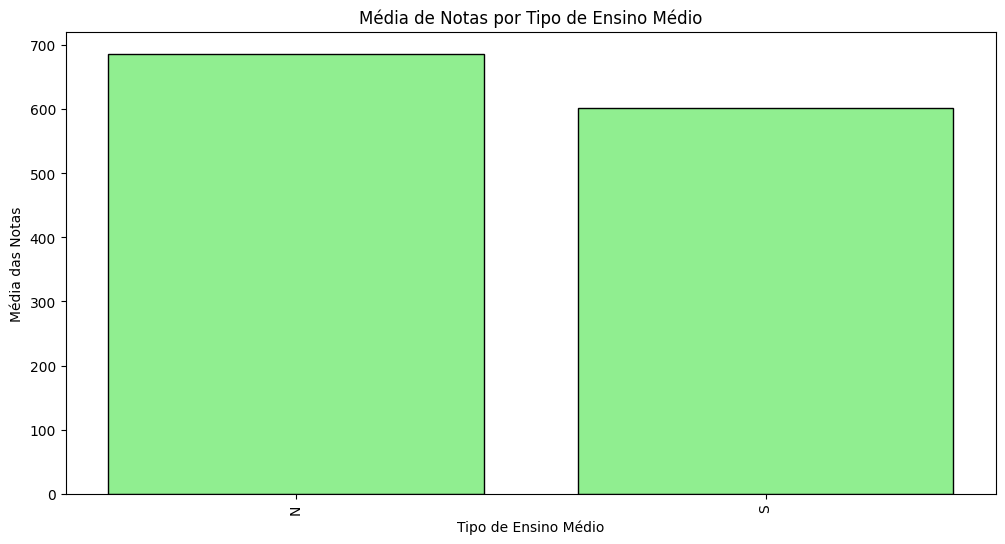

In [18]:
# Verificando a distribuição de candidatos por tipo de ENSINO_MEDIO
print(df['ENSINO_MEDIO'].value_counts())

# Estatísticas de notas por tipo de ensino médio
df_ensino_medio = df.groupby('ENSINO_MEDIO')['NU_NOTA_CANDIDATO'].agg(['mean','median','count']).reset_index()
df_ensino_medio.columns = ['TipoEnsinoMedio', 'MediaNota', 'MedianaNota', 'QuantidadeCandidatos']
print(df_ensino_medio)

# Visualização
plt.figure(figsize=(12, 6))
plt.bar(df_ensino_medio['TipoEnsinoMedio'], df_ensino_medio['MediaNota'], color='lightgreen', edgecolor='black')
plt.title('Média de Notas por Tipo de Ensino Médio')
plt.xlabel('Tipo de Ensino Médio')
plt.ylabel('Média das Notas')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Comparando médias de notas de candidatos quilombolas vs não quilombolas
if 'QUILOMBOLA' in df.columns:
    df_quilombola = df.groupby('QUILOMBOLA')['NU_NOTA_CANDIDATO'].agg(['mean','median','count']).reset_index()
    df_quilombola.columns = ['Quilombola', 'MediaNota', 'MedianaNota', 'QuantidadeCandidatos']
    print(df_quilombola)

# Comparando médias de notas de candidatos com deficiência vs sem deficiência
if 'DEFICIENTE' in df.columns:
    df_deficiente = df.groupby('DEFICIENTE')['NU_NOTA_CANDIDATO'].agg(['mean','median','count']).reset_index()
    df_deficiente.columns = ['Deficiente', 'MediaNota', 'MedianaNota', 'QuantidadeCandidatos']
    print(df_deficiente)

  Quilombola   MediaNota  MedianaNota  QuantidadeCandidatos
0          N  628.509749      632.360                250941
1          S  527.993053      523.005                  4062
  Deficiente   MediaNota  MedianaNota  QuantidadeCandidatos
0          N  629.338196      633.100                244551
1          S  570.061967      567.465                 10452
